Es gibt verschiedene Arten von Beschriftungen in einem Diagramm, dazu gehören zum Beispiel Achsenbeschriftungen, Titel und Legenden, die wir jeweils individualisieren können.

___
### Text und Beschriftungen einfügen

Die Titel und Achsenbeschriftungen können mit folgenden Funktionen jeweils angepasst werden:  

- `plt.title("Der Titel")`
- `plt.xlabel("Beschriftung der x-Achse")`
- `plt.ylabel("Beschriftung der y-Achse")`

Außerdem können wir auch einen Untertitel hinzufügen, dafür benutzen wir zunächst `plt.suptitle('Der Haupttitel')` für den Haupttitel. Mit `plt.title('Der Untertitel')` wird dann der Untertitel hinzugefügt. 

Um in einer Visualisierung Text an einer bestimmten Stelle einzufügen können wir mithilfe von `plt.text(x, y, "beliebiger Text")` einen beliebigen Text in Form eines `Strings` an die Stellen  `x`, `y` hinzufügen. 


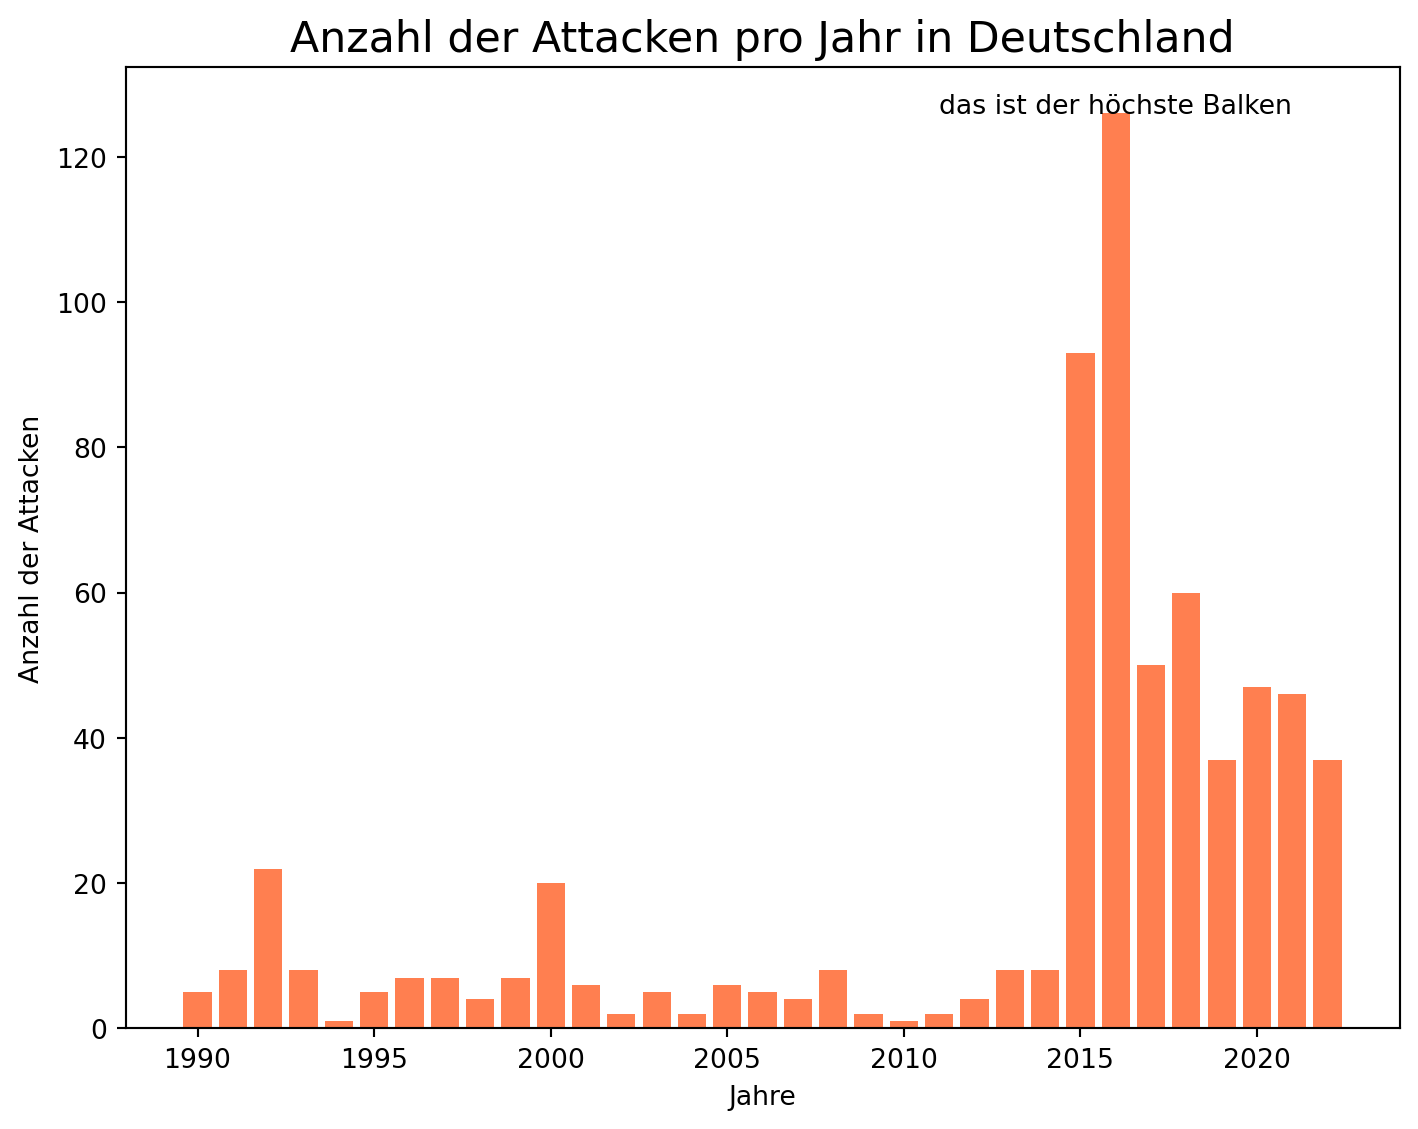

In [1]:
#| fig-cap: "Anzahl der Attacken pro Jahr in Deutschland mit eingefügtem Text"

import matplotlib.pyplot as plt
import pandas as pd

#Einlesen des Datensatzes
df = pd.read_excel('2023-rtv-1990-2022_without-sources.xlsx')

# Filtern der Daten für Deutschland
df_germany = df[df['country_name'] == 'Germany']

# Zählen der Angriffe pro Jahr
attacks_per_year = df_germany.groupby('year').size().reset_index(name='attack_count')

# Erstellen des Balkendiagramms
plt.figure(figsize=(7.5, 6))
bars = plt.bar(attacks_per_year['year'], attacks_per_year['attack_count'], color='coral')

# Hinzufügen von Beschriftungen und Titel
plt.xlabel('Jahre')
plt.ylabel('Anzahl der Attacken')
plt.title('Anzahl der Attacken pro Jahr in Deutschland', fontsize=16)

# Finden des höchsten Balkens und Hinzufügen von Text
max_value = attacks_per_year['attack_count'].max()
max_year = attacks_per_year[attacks_per_year['attack_count'] == max_value]['year'].values[0]
plt.text(max_year, max_value, "das ist der höchste Balken", ha='center')

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

Dieses Diagramm zeigt uns die Anzahl der Attacken pro Jahr in Deutschland, zudem haben wir an dem höchsten Balken noch einen Text eingefügt. Dies funktioniert mit der Funktion `plt.text(max_year, max_value, "das ist der höchste Balken", ha='center')`. Die Variablen `max_year` und `max_value` sind die Koordinaten des höchsten Balkens, an dem wir den Text haben wollen. Mithilfe von `ha='cneter'` haben wir noch die Position angepasst, sodass der Text mittig erscheint. 

___
### Beschriftungen rotieren 

Um Beschriftungen für eine bessere Lesbarkeit zu rotieren können wir die Funktion `plt.xticks()` mit dem Parameter `rotation` verwenden. 


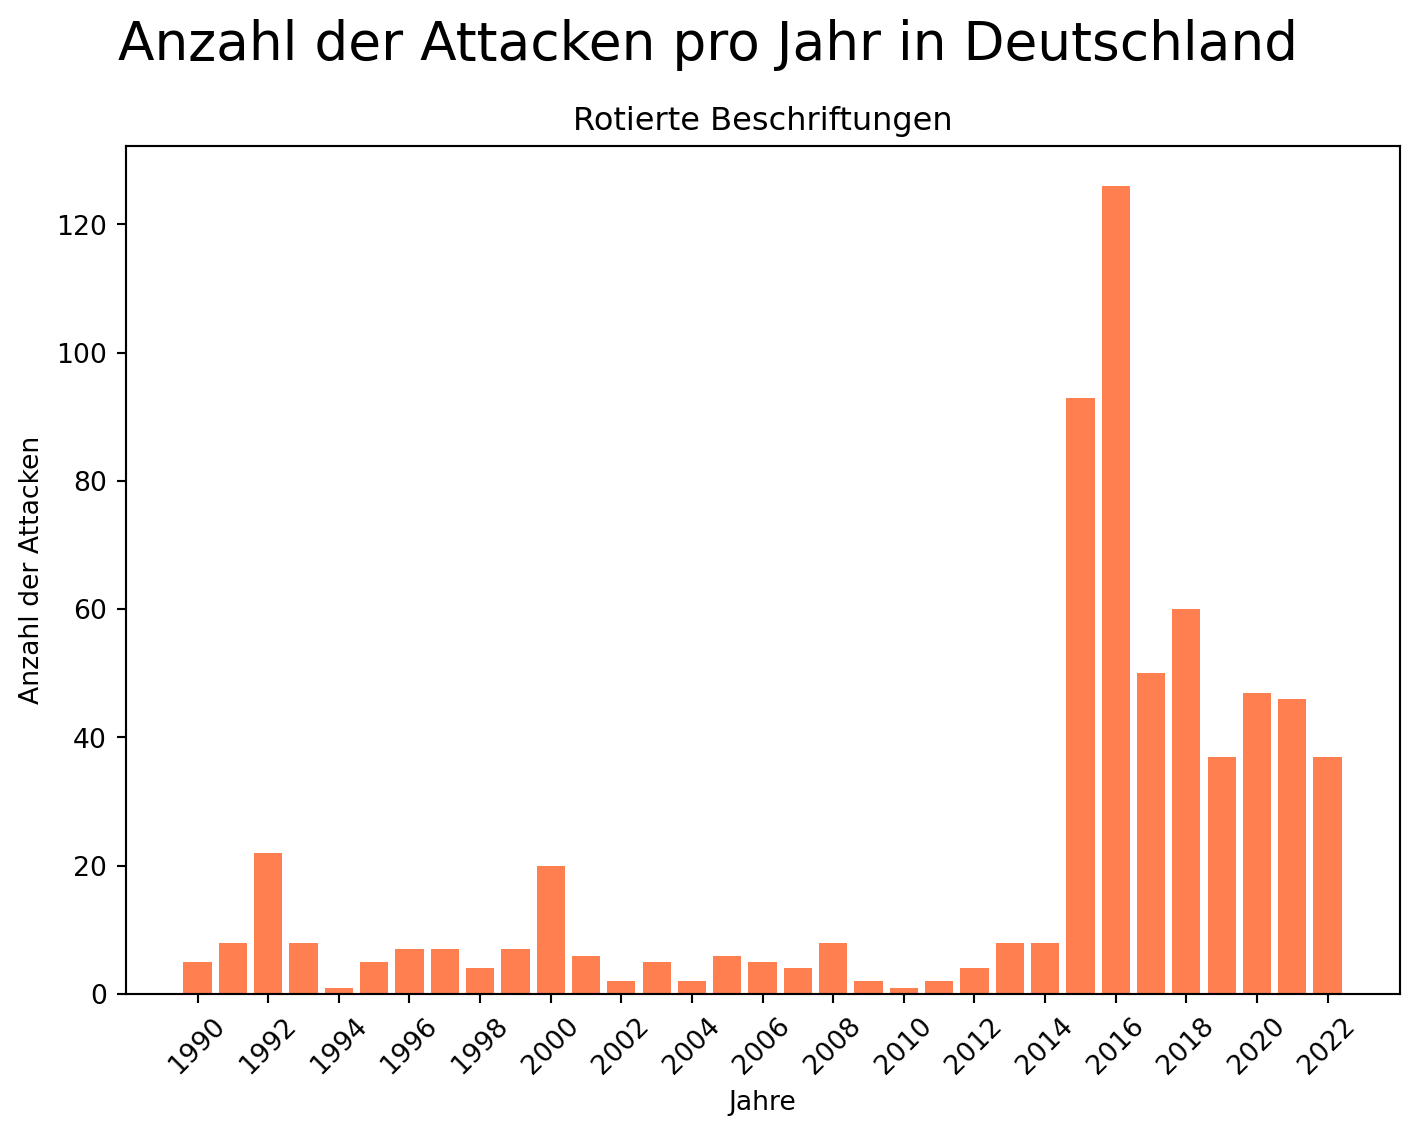

In [2]:
#| fig-cap: "Anzahl der Attacken pro Jahr in Deutschland"

import matplotlib.pyplot as plt
import pandas as pd

#Einlesen des Datensatzes
df = pd.read_excel('2023-rtv-1990-2022_without-sources.xlsx')

# Filtern der Daten für Deutschland
df_germany = df[df['country_name'] == 'Germany']

# Zählen der Angriffe pro Jahr
attacks_per_year = df_germany.groupby('year').size().reset_index(name='attack_count')

# Erstellen des Balkendiagramms
plt.figure(figsize=(7.5, 6))
bars = plt.bar(attacks_per_year['year'], attacks_per_year['attack_count'], color='coral')

# Hinzufügen von Beschriftungen und Titel
plt.xlabel('Jahre')
plt.ylabel('Anzahl der Attacken')
plt.suptitle('Anzahl der Attacken pro Jahr in Deutschland', fontsize=20)
plt.title('Rotierte Beschriftungen')

# Anpassung der x-Achse Ticks und Beschriftungen
plt.gca().set_xticks(attacks_per_year['year'][::2]) # EIn Strich alle 2 Jahre
plt.xticks(rotation=45) # Rotieren um 45 Grad

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

In diesem Diagramm haben wir die x-Achsenbeschriftung mit `plt.xticks(rotation=45)` um 45 Grad rotiert, um die Jahreszahlen lesbarer zu gestalten. 

___
### Die Legende 
Eine verständliche und lesbare Legende ist sehr wichtig. 
Mit `plt.legend()` können wir eine Legende erstellen, die automatisch an die beste Stelle gesetzt wird, sodass sie die Daten nicht verdeckt.

Wenn wir die Legende an einer anderen Stelle haben wollen, können wir den Paramter `loc` verwenden: `plt.legend(loc="lower left")`. Dabei können wir `loc` Werte wie `"upper"`, `"lower"`, `"center"`, `"left"`, und `"right"` übergeben, um die Position anzupassen. 
Die automatisch voreingestellte Position ohne Parameter ist übrigens identisch zu `plt.legend(loc="best")`. 


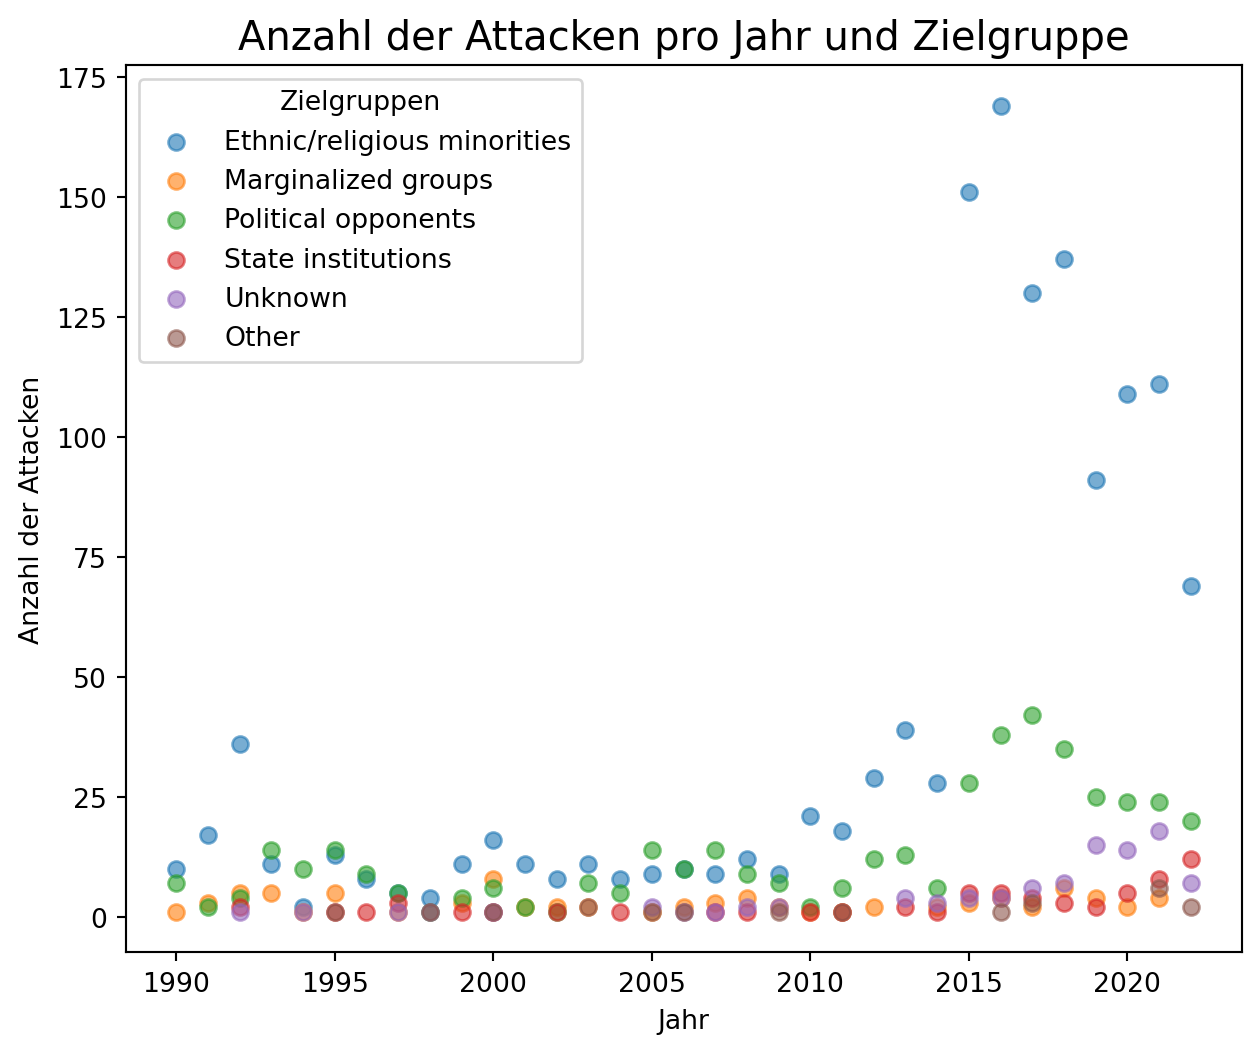

In [3]:
#| fig-cap: "Anzahl der Attacken pro Jahr und Zielgruppe"

import matplotlib.pyplot as plt
import pandas as pd

#Einlesen des Datensatzes
df = pd.read_excel('2023-rtv-1990-2022_without-sources.xlsx')
 
# Gruppieren nach Jahr und Zielgruppe und Zählen der Attacken pro Jahr und Zielgruppe
incident_counts = df.groupby(['year', 'grouped_target_group']).size().reset_index(name='incident_count')
 
# Scatterplot erstellen
plt.figure(figsize=(7.5, 6))
 
# Scatterplot für die Anzahl der Vorfälle pro Jahr und Zielgruppe
for target_group in incident_counts['grouped_target_group'].unique():
    group_data = incident_counts[incident_counts['grouped_target_group'] == target_group]
    plt.scatter(
        group_data['year'],
        group_data['incident_count'],
        alpha=0.6, 
        label=target_group
    )
 
# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Attacken')
plt.title('Anzahl der Attacken pro Jahr und Zielgruppe', fontsize=15)

#Hinzufügen der Legende 
plt.legend(title='Zielgruppen', loc="upper left", fontsize=10)
 
# Plot anzeigen
plt.show()

In diesem Scatterplot haben wir die Anzahl der Attacken pro Zielgruppe und Land visualisiert. Mithilfe von `plt.legend(title='Zielgruppen', loc="upper left", fontsize=10)` haben wir dann eine Legende mit Titel, angepasster Position und Schriftgröße eingefügt. 

___
### Schriftarten und Größen

 Durch den Parameter `fontsize` kann die Schriftgröße von Text angepasst werden. Um die Schriftart zu ändern können wir dem Parameter `family` einen String mit dem Namen einer Schriftart übergeben. 


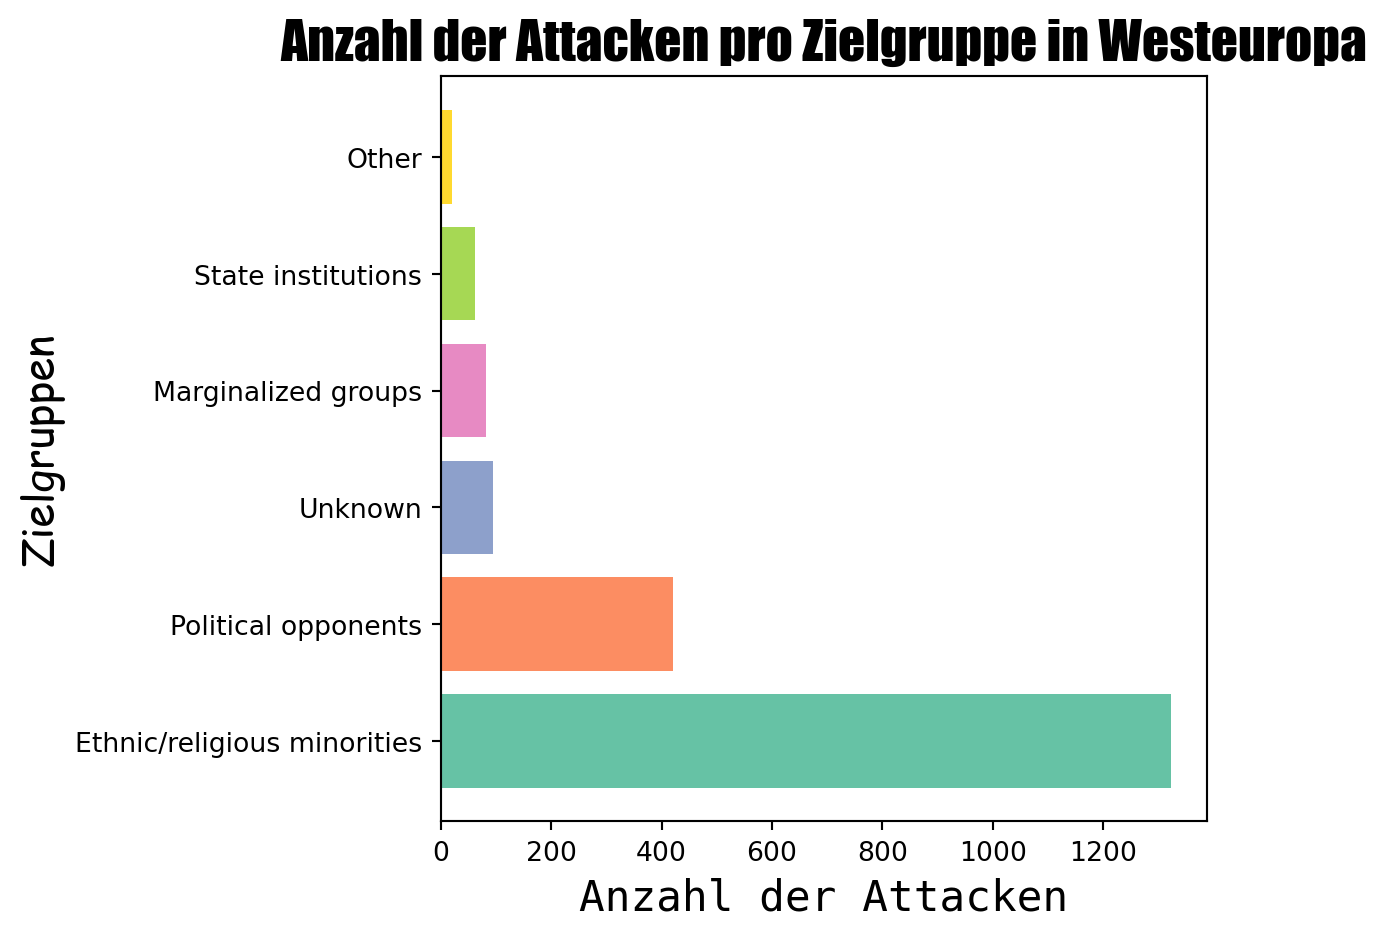

In [4]:
#| fig-cap: "Anzahl der Attacken pro Zielgruppe"

import matplotlib.pyplot as plt
import pandas as pd

# Einlesen des Datensatzes
df = pd.read_excel('2023-rtv-1990-2022_without-sources.xlsx')

# Berechne die Anzahl der Attacken pro Zielgruppe
target_group_counts = df['grouped_target_group'].value_counts().reset_index()
target_group_counts.columns = ['grouped_target_group', 'attack_count']

# Erstellen des Balkendiagramms mit einer Colormap
plt.figure(figsize=(6.5, 5))
plt.barh(target_group_counts['grouped_target_group'], target_group_counts['attack_count'], color=plt.cm.Set2(range(len(target_group_counts))))

# Hinzufügen von Beschriftungen und Titel
plt.xlabel('Anzahl der Attacken', fontsize=16, family='monospace')
plt.ylabel('Zielgruppen', fontsize=16, family='cursive')
plt.title('Anzahl der Attacken pro Zielgruppe in Westeuropa', fontsize=20, family='fantasy')

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

Hier haben wir ein Diagramm mit verschiedenen Schriftgrößen und Schriftarten erstellt, dabei können wir die Parameter `fontsize` und `family` allen Text-Funktionen übergeben. 

Global kann die Schrift für das gesamte Jupyter-Notebook auch mit `plt.rc("font", family="serif", size=20)` angepasst werden, dann haben alle Texte in unseren Visualisierungen die gleichen Schriftanpassungen. 

 Es gibt auch noch ganz viele weitere Schriftarten, [hier](https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) befindet sich eine Liste mit Beispielen.
